<a href="https://colab.research.google.com/github/stephyangeles/P5_ProblemaDeRegresion_G4/blob/main/P5_ProblemaDeRegresion_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**👀** **Faltantes**

*   Visualización de outliers ✅

*   Tratamiento de missing data ✅

*   Limpieza y features ✅
  ```
  Ejemplo:
  # Convertir columnas booleanas
      df["accident_info"] = df["accident"].apply(lambda x: False if x == "None reported" else True)
      df["clean_title"] = df["clean_title"].apply(lambda x: True if x == "Yes" else False)

      # Extraer potencia y tamaño del motor desde 'engine'
      df["horsepower"] = df["engine"].str.extract(r'(\d+\.?\d*)HP').astype(float)
      df["engine_L"] = df["engine"].str.extract(r'(\d+\.?\d*)L').astype(float)
  ```

  ```
  # Finalmente no se implementa
  from datetime import datetime

  def create_features(df):
      current_year = datetime.now().year
      df['vehicle_age'] = current_year - df['model_year']
      df['mileage_per_year'] = df['milage'] / df['vehicle_age']
      
  create_features(df_train)
  create_features(df_test)
  ```

*   Cross validation

*   Modelos: Linear múltiple, SVR, ... ?

*   Export resultados



### Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Carga de archivos

In [ ]:
df_sub=pd.read_csv("https://raw.githubusercontent.com/stephyangeles/P5_ProblemaDeRegresion_G4/Data/DataSet/sample_submission.csv")
df_train=pd.read_csv("https://raw.githubusercontent.com/stephyangeles/P5_ProblemaDeRegresion_G4/Data/DataSet/train.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com//stephyangeles/P5_ProblemaDeRegresion_G4/Data/DataSet/test.csv")

### Exploración inicial

In [ ]:
df_test.head(10)

id          brand                  model  model_year  milage fuel_type  \
0  188533           Land         Rover LR2 Base        2015   98000  Gasoline   
1  188534           Land      Rover Defender SE        2020    9142    Hybrid   
2  188535           Ford     Expedition Limited        2022   28121  Gasoline   
3  188536           Audi          A6 2.0T Sport        2016   61258  Gasoline   
4  188537           Audi   A6 2.0T Premium Plus        2018   59000  Gasoline   
5  188538      Chevrolet  Express 2500 Work Van        2013   99524  Gasoline   
6  188539          Lexus            RX 350 Base        2008  194000  Gasoline   
7  188540      Chevrolet             Impala 1LT        2019   40208  Gasoline   
8  188541  Mercedes-Benz       S-Class S 63 AMG        2016    7600  Gasoline   
9  188542        Genesis         G80 3.3T Sport        2017   63300  Gasoline   

                                              engine  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2                    3.5L V6 24V PDI DOHC Twin Turbo   
3                                     2.0 Liter TFSI   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5       285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel   
6      270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
7                               3.8L V6 24V GDI DOHC   
8       536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel   
9      365.0HP 3.3L V6 Cylinder Engine Gasoline Fuel   

                     transmission              ext_col    int_col  \
0                     6-Speed A/T                White      Beige   
1                     8-Speed A/T               Silver      Black   
2              10-Speed Automatic                White      Ebony   
3                       Automatic      Silician Yellow      Black   
4                             A/T                 Gray      Black   
5                             A/T                Black      Black   
6  Transmission w/Dual Shift Mode               Silver       Gray   
7               6-Speed Automatic  Silver Ice Metallic  Jet Black   
8                     7-Speed A/T                Black      Black   
9                     8-Speed A/T                Black      Black   

        accident clean_title  
0  None reported         Yes  
1  None reported         Yes  
2  None reported         NaN  
3  None reported         NaN  
4  None reported         Yes  
5  None reported         Yes  
6  None reported         Yes  
7  None reported         Yes  
8  None reported         Yes  
9  None reported         Yes

In [ ]:
df_train.head(10)

id          brand               model  model_year  milage      fuel_type  \
0   0           MINI       Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln               LS V8        2002  143250       Gasoline   
2   2      Chevrolet   Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis    G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz         Metris Base        2021    7388       Gasoline   
5   5           Audi       A6 2.0T Sport        2018   40950       Gasoline   
6   6           Audi           A8 L 3.0T        2016   62200       Gasoline   
7   7      Chevrolet  Silverado 1500 1LZ        2016  102604  E85 Flex Fuel   
8   8           Ford           F-150 XLT        2020   38352       Gasoline   
9   9            BMW             M4 Base        2015   74850       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
6      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
7  355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
8                    2.7L V6 24V PDI DOHC Twin Turbo   
9  425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   

                     transmission                         ext_col int_col  \
0                             A/T                          Yellow    Gray   
1                             A/T                          Silver   Beige   
2                             A/T                            Blue    Gray   
3  Transmission w/Dual Shift Mode                           Black   Black   
4                     7-Speed A/T                           Black   Beige   
5                             A/T                           White       –   
6                     8-Speed A/T                           Black   Black   
7                             A/T                           White    Gray   
8              10-Speed Automatic  Snowflake White Pearl Metallic   Black   
9  Transmission w/Dual Shift Mode                           Black    Blue   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500  
5                           None reported         Yes  29950  
6                           None reported         Yes  28500  
7                           None reported         Yes  12500  
8                           None reported         Yes  62890  
9                           None reported         Yes   4000

In [ ]:
df_sub.head(10)

id      price
0  188533  43878.016
1  188534  43878.016
2  188535  43878.016
3  188536  43878.016
4  188537  43878.016
5  188538  43878.016
6  188539  43878.016
7  188540  43878.016
8  188541  43878.016
9  188542  43878.016

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      125690 non-null  int64  
 1   price   125690 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [ ]:
print('La forma del train dataset es', df_train.shape)
print('La forma del test dataset es', df_test.shape , '\n')
print('Rows duplicadas en train dataset :', df_train.duplicated().sum() )
print('Rows duplicadas en test dataset :', df_test.duplicated().sum() , '\n')

La forma del train dataset es (188533, 13)
La forma del test dataset es (125690, 12) 

Rows duplicadas en train dataset : 0
Rows duplicadas en test dataset : 0 



In [ ]:
print('>> Estadísticas descriptivas de Train Data \n')
df_train.describe().T

>> Estadísticas descriptivas de Train Data 



count          mean           std     min      25%      50%  \
id          188533.0  94266.000000  54424.933488     0.0  47133.0  94266.0   
model_year  188533.0   2015.829998      5.660967  1974.0   2013.0   2017.0   
milage      188533.0  65705.295174  49798.158076   100.0  24115.0  57785.0   
price       188533.0  43878.016178  78819.522254  2000.0  17000.0  30825.0   

                 75%        max  
id          141399.0   188532.0  
model_year    2020.0     2024.0  
milage       95400.0   405000.0  
price        49900.0  2954083.0

In [ ]:
print('>> Estadísticas descriptivas de Test Data \n')
df_test.describe().T

>> Estadísticas descriptivas de Test Data 



count           mean           std       min        25%  \
id          125690.0  251377.500000  36283.722005  188533.0  219955.25   
model_year  125690.0    2015.797526      5.673797    1974.0    2013.00   
milage      125690.0   66042.581510  50223.858435     100.0   24500.00   

                 50%        75%       max  
id          251377.5  282799.75  314222.0  
model_year    2017.0    2020.00    2024.0  
milage       57500.0   95798.00  405000.0

### EDA (Exploratory Data Analysis) using Profiler

1.   Elemento de lista
2.   Elemento de lista



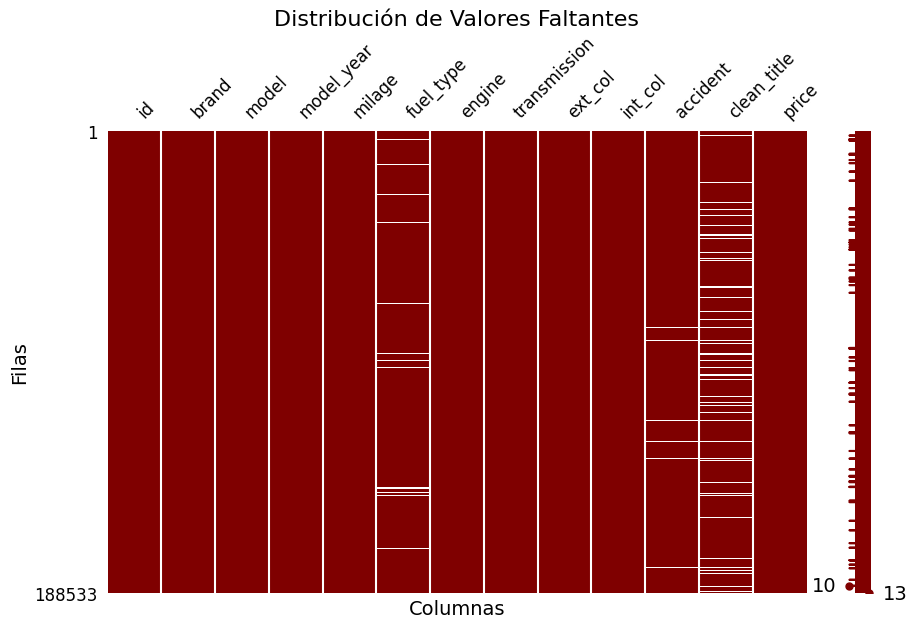

In [ ]:
matrix_plot = msno.matrix(df_train, figsize=(10, 6), color=(0.5, 0, 0))
plt.title('Distribución de Valores Faltantes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Columnas', fontsize=14)
plt.ylabel('Filas', fontsize=14)
plt.show()

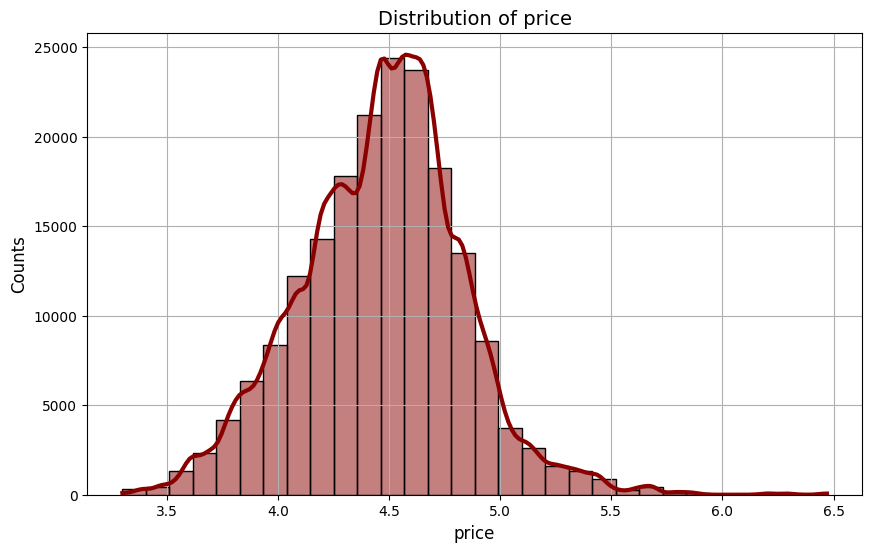

In [ ]:
def plot_num_distribution(df, target_column):

    plt.figure(figsize=(10, 6))

    sns.histplot(
        np.log10(df[target_column]),
        stat='count',
        kde=True,
        bins=30,
        color='darkred',
        line_kws = {'lw':3})

    plt.title(f'Distribution of {target_column}', fontsize=14)
    plt.xlabel(target_column, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.grid(True)
    plt.show()

plot_num_distribution(df_train, 'price')

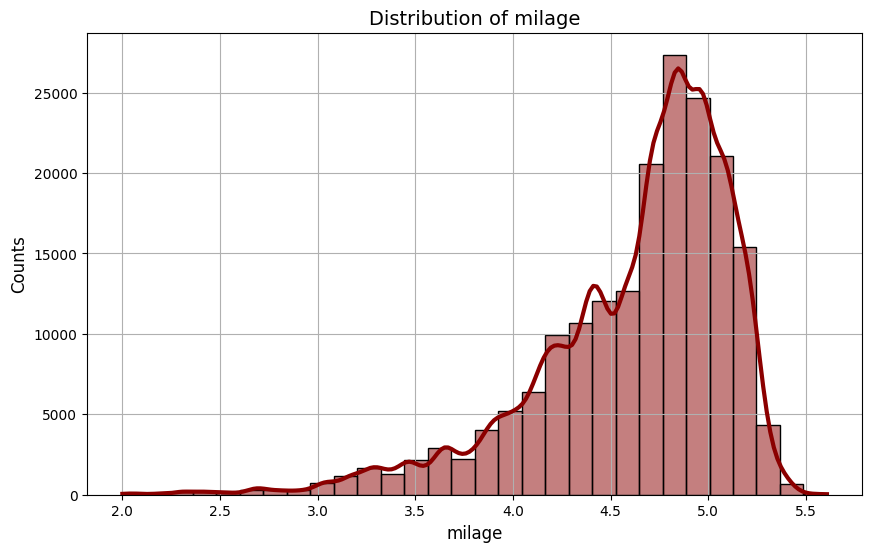

In [ ]:
plot_num_distribution(df_train, 'milage')

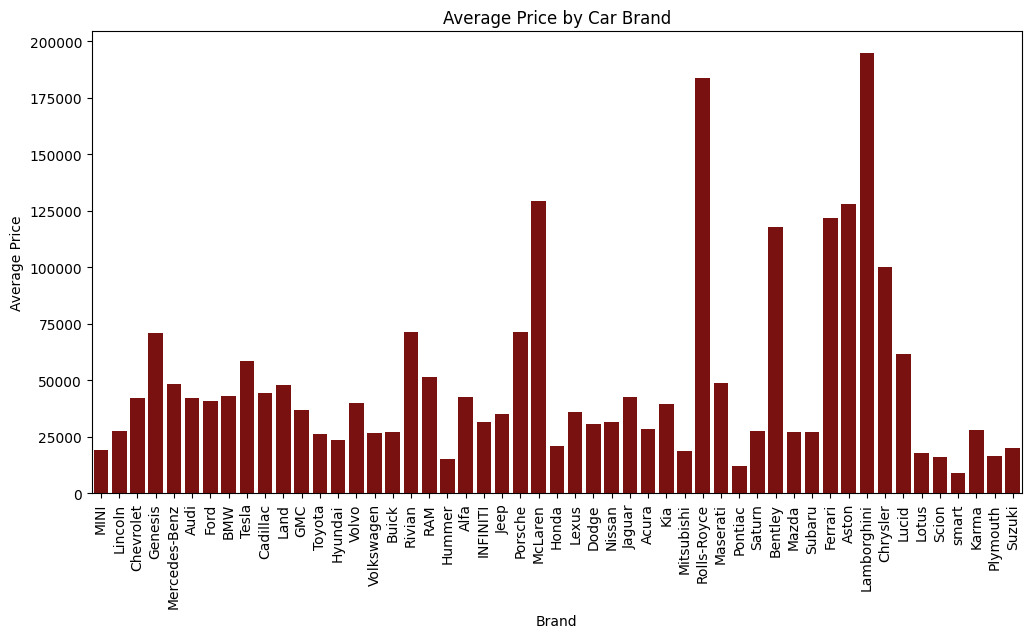

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_train[:10000], errorbar=None, color='darkred',
)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-25fcb7c3cd30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_train['accident'], x=df_train['price'], palette='Set2',


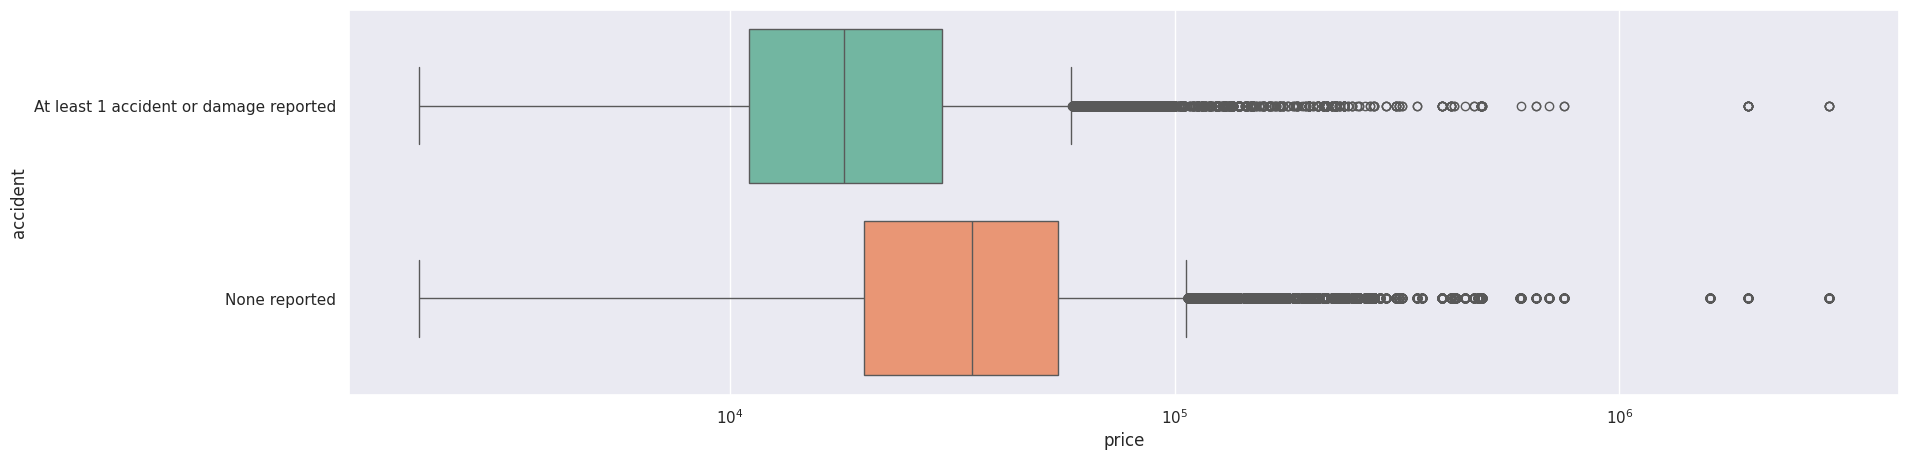

In [ ]:
sns.set(rc={'figure.figsize': (20, 5)})
mean_price_order = df_train.groupby('accident')['price'].median().sort_values().index
sns.boxplot(y=df_train['accident'], x=df_train['price'], palette='Set2',
           order=mean_price_order)
plt.xscale('log')

<ipython-input-17-5f0837cd42fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_train['fuel_type'], x=df_train['price'], palette='Set2',


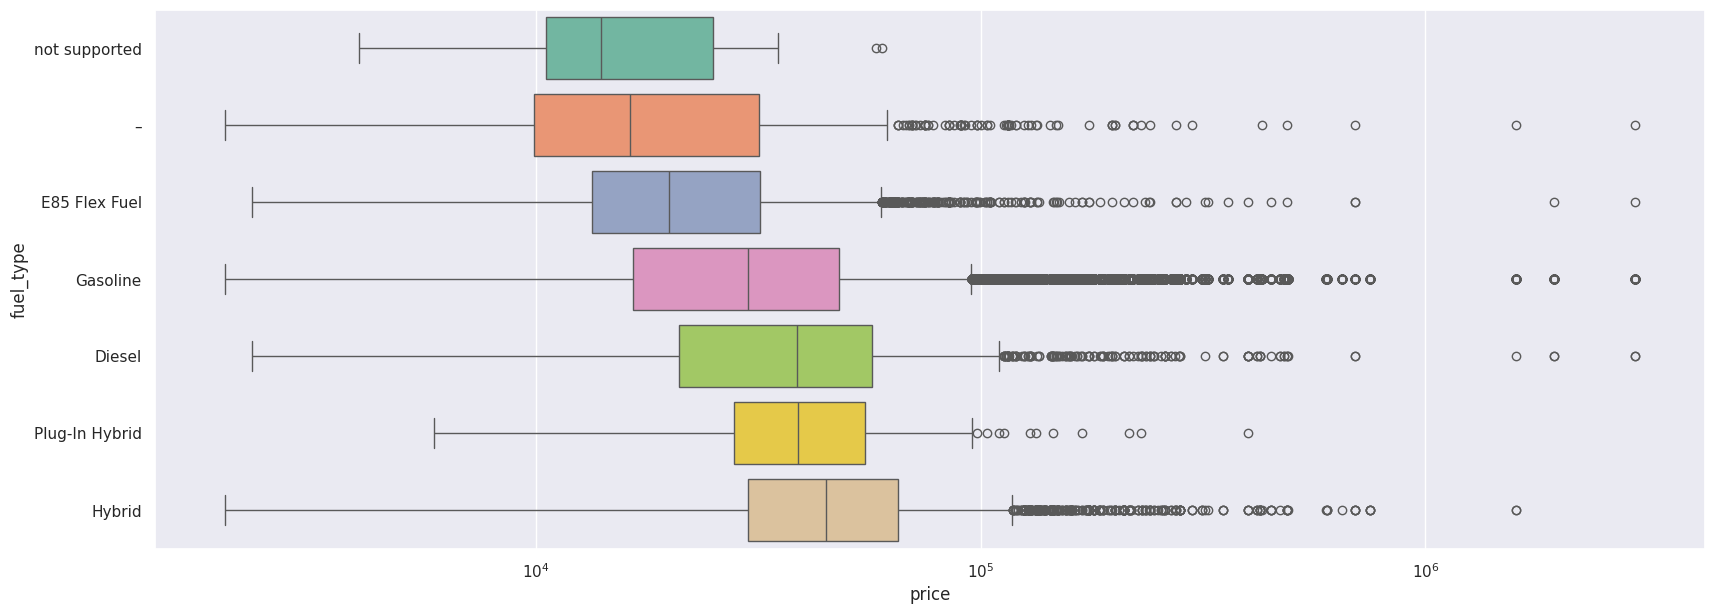

In [ ]:
sns.set(rc={'figure.figsize': (20, 7)})
mean_price_order = df_train.groupby('fuel_type')['price'].median().sort_values().index
sns.boxplot(y=df_train['fuel_type'], x=df_train['price'], palette='Set2',
           order=mean_price_order)
plt.xscale('log')

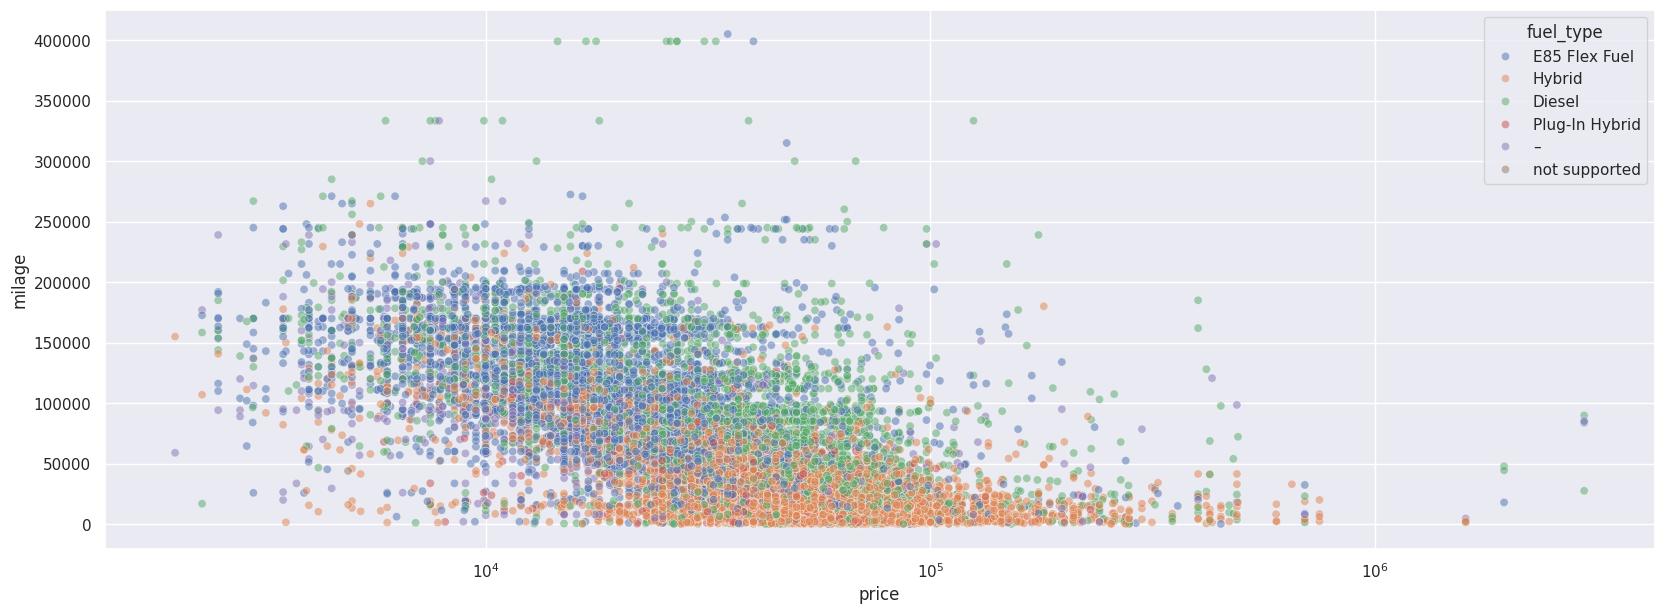

In [ ]:
sns.scatterplot(x=df_train[df_train['fuel_type'] != 'Gasoline']['price'],
                y=df_train[df_train['fuel_type'] != 'Gasoline']['milage'],
                hue = df_train[df_train['fuel_type'] != 'Gasoline']['fuel_type'],
                color='grey', alpha=0.5)
plt.xscale('log')

In [ ]:
# Función para detectar outliers usando el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar outliers en variables numéricas importantes
for col in ['model_year', 'milage']:
    outliers, lower, upper = detect_outliers(df_train, col)
    outlier_percentage = (len(outliers) / len(df_train)) * 100

    # Analizar características de los outliers
    if len(outliers) > 0:
        print("\nEstadísticas de outliers:")
        print(outliers[col].describe())

        # Top 5 marcas con más outliers
        top_outlier_brands = outliers['brand'].value_counts().head(5)
        print("\nTop 5 marcas con más outliers:")
        print(top_outlier_brands)




Estadísticas de outliers:
count    5132.000000
mean     1999.746687
std         2.642202
min      1974.000000
25%      1999.000000
50%      2001.000000
75%      2001.000000
max      2002.000000
Name: model_year, dtype: float64

Top 5 marcas con más outliers:
brand
Chevrolet    816
BMW          551
Ford         514
Toyota       491
Jeep         398
Name: count, dtype: int64

Estadísticas de outliers:
count      1766.000000
mean     235158.252548
std       31461.434517
min      202666.000000
25%      212500.000000
50%      229450.000000
75%      245000.000000
max      405000.000000
Name: milage, dtype: float64

Top 5 marcas con más outliers:
brand
Ford         377
Toyota       318
Chevrolet    201
Lexus        112
Dodge        104
Name: count, dtype: int64


### Data cleaning & Feature Engineering

In [ ]:
columns_with_en_dash = df_train.columns[df_train.apply(lambda col: (col.astype(str) == "–").any())]
print(columns_with_en_dash)

Index(['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col'], dtype='object')


In [ ]:
df_train.replace("–", np.nan, inplace=True)
df_test.replace("–", np.nan, inplace=True)

In [ ]:
unique_engine_values = df_train['engine'].unique()
print(unique_engine_values)

['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas'
 '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas']


In [ ]:
rows_with_nan_fuel_and_electric = df_train[df_train['fuel_type'].isnull() & df_train['engine'].str.contains('Electric Fuel', case=False, na=False)]
len(rows_with_nan_fuel_and_electric)
rows_with_nan_fuel_and_electric

id    brand                    model  model_year  milage  \
11          11    Tesla            Model S P100D        2015   81500   
32          32    Tesla            Model S P100D        2018   30300   
52          52    Tesla              Model X 75D        2021   88000   
161        161    Tesla       Model S Long Range        2021    9500   
174        174  Porsche             Taycan Turbo        2023    1794   
...        ...      ...                      ...         ...     ...   
188339  188339    Tesla             Model S 100D        2018   28333   
188455  188455     Ford        Mustang Mach-E GT        2022    8000   
188462  188462     Ford        Mustang Mach-E GT        2023    9000   
188484  188484     Ford            Model X P100D        2018   52000   
188489  188489    Tesla  Model X Long Range Plus        2022    4786   

       fuel_type                                       engine transmission  \
11           NaN          Electric Motor Electric Fuel System  1-Speed A/T   
32           NaN  518.0HP Electric Motor Electric Fuel System          A/T   
52           NaN  518.0HP Electric Motor Electric Fuel System  1-Speed A/T   
161          NaN  670.0HP Electric Motor Electric Fuel System          A/T   
174          NaN          Electric Motor Electric Fuel System  2-Speed A/T   
...          ...                                          ...          ...   
188339       NaN  518.0HP Electric Motor Electric Fuel System  1-Speed A/T   
188455       NaN  480.0HP Electric Motor Electric Fuel System          A/T   
188462       NaN  480.0HP Electric Motor Electric Fuel System          A/T   
188484       NaN  534.0HP Electric Motor Electric Fuel System  1-Speed A/T   
188489       NaN  557.0HP Electric Motor Electric Fuel System          A/T   

       ext_col int_col                                accident clean_title  \
11        Gray   White                           None reported         Yes   
32       White   White                           None reported         Yes   
52       Black   Black                           None reported         Yes   
161      White   Beige                           None reported         Yes   
174       Blue   Black                           None reported         Yes   
...        ...     ...                                     ...         ...   
188339  Silver   Black  At least 1 accident or damage reported         Yes   
188455  Orange   White                           None reported         Yes   
188462  Orange   Black                           None reported         Yes   
188484    Gray   Black                           None reported         Yes   
188489   Black   Black                           None reported         Yes   

         price  
11       19000  
32       64000  
52       53600  
161      89999  
174      83500  
...        ...  
188339   49999  
188455  115000  
188462   85000  
188484   45000  
188489   92000  

[4405 rows x 13 columns]

In [ ]:
rows_with_no_fuel_and_electric = df_test[df_test['fuel_type'].isnull() & df_test['engine'].str.contains('Electric Fuel', case=False, na=False)]
len(rows_with_no_fuel_and_electric)

2934

In [ ]:
df_train.loc[rows_with_nan_fuel_and_electric.index, 'fuel_type'] = 'Electric'
after_change_count = len(df_train[df_train['fuel_type'] == 'Electric'])
after_change_count

4405

In [ ]:
df_test.loc[rows_with_no_fuel_and_electric.index, 'fuel_type'] = 'Electric'
after_change_count = len(df_test[df_test['fuel_type'] == 'Electric'])
after_change_count

2934

In [ ]:
unique_engine_values = df_train['clean_title'].unique()
print(unique_engine_values)

['Yes' nan]


In [ ]:
unique_engine_values = df_train['accident'].unique()
print(unique_engine_values)

['None reported' 'At least 1 accident or damage reported' nan]


In [ ]:
# Extraer potencia y tamaño del motor desde 'engine'
df_train["horsepower"] = df_train["engine"].str.extract(r'(\d+\.?\d*)HP').astype(float)
df_train["engine_L"] = df_train["engine"].str.extract(r'(\d+\.?\d*)L').astype(float)
df_test["horsepower"] = df_test["engine"].str.extract(r'(\d+\.?\d*)HP').astype(float)
df_test["engine_L"] = df_test["engine"].str.extract(r'(\d+\.?\d*)L').astype(float)

df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        1459
engine            925
transmission       87
ext_col           366
int_col          4527
accident         2452
clean_title     21419
price               0
horsepower      33259
engine_L        14214
dtype: int64

In [ ]:
df_test.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type         987
engine            617
transmission       40
ext_col           223
int_col          2953
accident         1632
clean_title     14239
horsepower      22181
engine_L         9407
dtype: int64

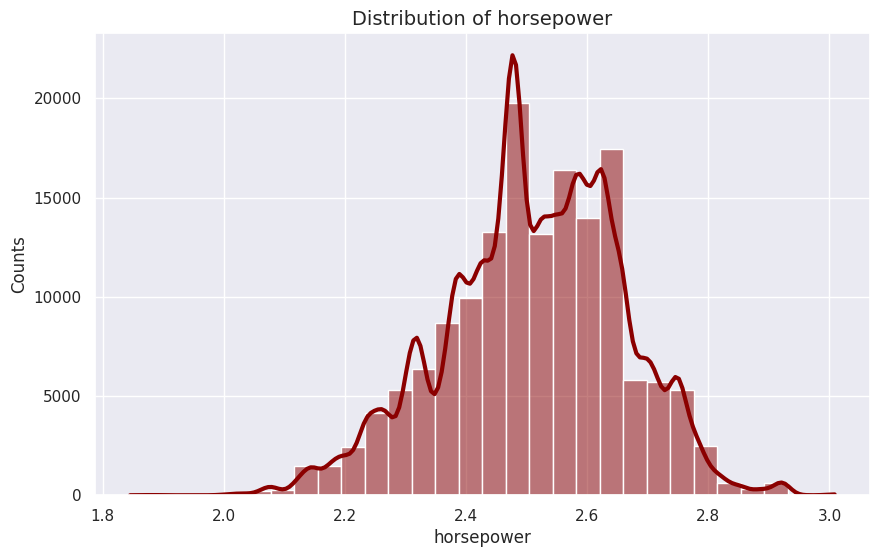

In [ ]:
plot_num_distribution(df_train, 'horsepower')

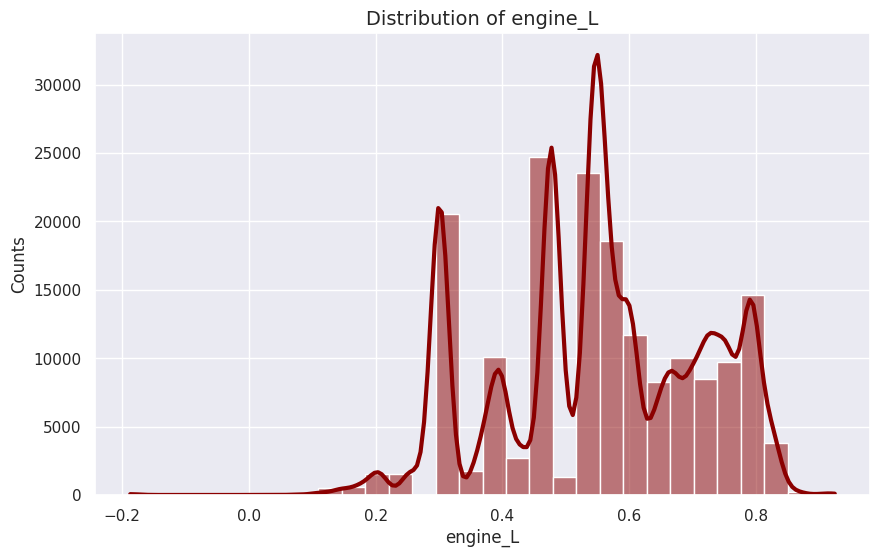

In [ ]:
plot_num_distribution(df_train, 'engine_L')

In [ ]:
def cleaning(data):
  df = data.copy()
  cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
                'int_col', 'accident']

  for feature in ['fuel_type', 'accident', 'clean_title', 'engine', 'transmission', 'ext_col', 'int_col']:
    df[feature] = df[feature].fillna("no_entry")

  df['horsepower'] = df['horsepower'].fillna(-1)
  df['engine_L'] = df['engine_L'].fillna(-1)

  df['clean_title'] = np.where(df['clean_title']== 'Yes',1,0).astype('int16')
  df['mileage'] = df['milage']//100
  for feature in cat_cols:
        df[feature] = df[feature].astype('category')
  df.drop(['id'], axis=1, inplace=True)

  return df

In [ ]:
feat_cols = df_test.columns.to_list()
data_concat = cleaning(pd.concat([df_train[feat_cols], df_test]))
data_train = data_concat[:len(df_train)].copy()
data_train['price']=df_train['price']
data_test = data_concat[len(df_train):]
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
                'int_col', 'accident', 'model_year','mileage',
           ]
num_cols = ['milage', 'horsepower', 'engine_L']

In [ ]:
data_train.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
horsepower      0
engine_L        0
mileage         0
price           0
dtype: int64

In [ ]:
data_test.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
horsepower      0
engine_L        0
mileage         0
dtype: int64

In [ ]:
%%capture
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
from IPython.display import HTML # import the HTML object

In [ ]:
profile_change = ProfileReport(data_train,title="Used Cars. Profiling Report", explorative=True,)
profile_change.to_file("output_change.html")
HTML(filename='output_change.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:04<00:00,  3.27it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 9 ... 9 0 9]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]